## Import Libraries

In [176]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd
from shapely.geometry import Point, Polygon

## Import the data sets

There are only 3 datasets imported. The datasets are updated till 3rd March, 2020.

In [22]:
df1 = pd.read_csv('covid_19_data.csv')
df2 = pd.read_csv('time_series_covid_19_deaths.csv')
df3 = pd.read_csv('time_series_covid_19_recovered.csv')

The dataframe 'df1' is used for data analysis. For geopandas utilization, we need Latitude and longitude data, which is not provided in 'df1', so 'df2' is used. 

In [23]:
df1.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [86]:
df2.head()

,Province State,Country Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,0,0,0,0,0,0,...,4,4,5,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.18238,116.4142,0,0,0,0,0,1,...,3,3,3,3,4,4,4,4,4,4
2,Chongqing,Mainland China,30.05718,107.8740,0,0,0,0,0,0,...,3,3,4,5,5,5,5,5,5,6
3,Fujian,Mainland China,26.07783,117.9895,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Gansu,Mainland China,36.06110,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [89]:
df3.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,0,0,0,0,0,0,...,105,127,157,193,221,255,280,361,413,474
1,Beijing,Mainland China,40.18238,116.4142,0,0,1,2,2,2,...,48,56,69,80,98,108,114,122,145,153
2,Chongqing,Mainland China,30.05718,107.8740,0,0,0,0,0,0,...,79,102,128,152,184,207,225,254,274,299
3,Fujian,Mainland China,26.07783,117.9895,0,0,0,0,0,0,...,45,53,57,63,71,82,90,93,112,126
4,Gansu,Mainland China,36.06110,103.8343,0,0,0,0,0,0,...,24,31,39,39,49,54,58,62,65,71


In [196]:
df1.columns

Index(['ObservationDate', 'Province State', 'Country Region', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered', 'casesDate'],
      dtype='object')

Renaming the columns to normal names without '/' in their names to access the coulumn names easily. 

In [91]:
df1.rename(columns = {'Province/State':'Province State', 'Country/Region': 'Country Region'}, inplace= True)

In [92]:
df1.shape

(3084, 7)

In [93]:
df1.columns

Index(['ObservationDate', 'Province State', 'Country Region', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [94]:
df1.dtypes

ObservationDate     object
Province State      object
Country Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [95]:
df1.head(10)

,ObservationDate,Province State,Country Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [96]:
df1 = df1[['ObservationDate', 'Province State', 'Country Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered']]

In [97]:
df1.isna().sum()

ObservationDate      0
Province State     982
Country Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

Province has lot of missing values

In [98]:
df1.describe()

,Confirmed,Deaths,Recovered
count,3084.000000,3084.000000,3084.000000
mean,612.572633,17.466926,152.385214
std,5092.995803,182.555887,1446.430660
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,10.000000,0.000000,1.000000
75%,121.000000,1.000000,18.000000
max,67103.000000,2803.000000,33934.000000


Let's check the number of cases per day. 

In [197]:
df2PerDay = df1.groupby('Last Update')['Confirmed', 'Deaths', 'Recovered'].max()

In [83]:
df2PerDay.head()

,Confirmed,Deaths,Recovered
Last Update,,,
1/22/2020 17:00,444.0,17.0,28.0
1/23/20 17:00,444.0,17.0,28.0
1/24/20 17:00,549.0,24.0,31.0
1/25/20 17:00,761.0,40.0,32.0
1/26/20 16:00,1058.0,52.0,42.0


In [51]:
df1PerDay.describe()

,Confirmed,Deaths,Recovered
count,879.000000,879.000000,879.000000
mean,1987.013652,60.362912,474.850967
std,9399.947958,338.288829,2679.531743
min,0.000000,0.000000,0.000000
25%,31.500000,0.000000,2.000000
50%,146.000000,1.000000,22.000000
75%,560.500000,3.000000,137.500000
max,67103.000000,2803.000000,33934.000000


In [199]:
#max number of cases
df1PerDay['Confirmed'].max()

67103.0

In [200]:
#min no. of cases
df1PerDay['Confirmed'].min()

0.0

In [202]:
#date of max confirmed cases'Confirmed'
df1PerDay['Confirmed'].idxmax()

'2020-03-02T15:03:23'

In [55]:
df1PerDay['Confirmed'].idxmin()

'2020-02-23T18:23:06'

In [62]:
#number of cases per country

areaDf = df1.groupby(['Province State', 'Country Region'])['Confirmed', 'Deaths', 'Recovered'].max()

In [65]:
areaDf

,,Confirmed,Deaths,Recovered
Province State,Country Region,,,
"Montreal, QC",Canada,1.0,0.0,0.0
Anhui,Mainland China,990.0,6.0,917.0
Arizona,US,1.0,0.0,0.0
"Ashland, NE",US,11.0,0.0,0.0
Bavaria,Germany,5.0,0.0,0.0
Beijing,Mainland China,414.0,8.0,282.0
"Boston, MA",US,1.0,0.0,1.0
British Columbia,Canada,8.0,0.0,3.0
California,US,2.0,0.0,0.0


In [66]:
df['Country Region'].value_counts()

Mainland China          1265
US                       422
Australia                154
Canada                   104
South Korea               41
Japan                     41
Hong Kong                 41
Macau                     41
Taiwan                    41
Thailand                  41
Vietnam                   40
Singapore                 40
France                    39
Malaysia                  39
Nepal                     38
Sri Lanka                 36
Cambodia                  36
Germany                   35
United Arab Emirates      34
Philippines               34
Finland                   34
India                     33
UK                        32
Sweden                    32
Italy                     32
Russia                    32
Spain                     31
Belgium                   28
Others                    25
Egypt                     18
                        ... 
Mexico                     5
Estonia                    5
San Marino                 5
Denmark       

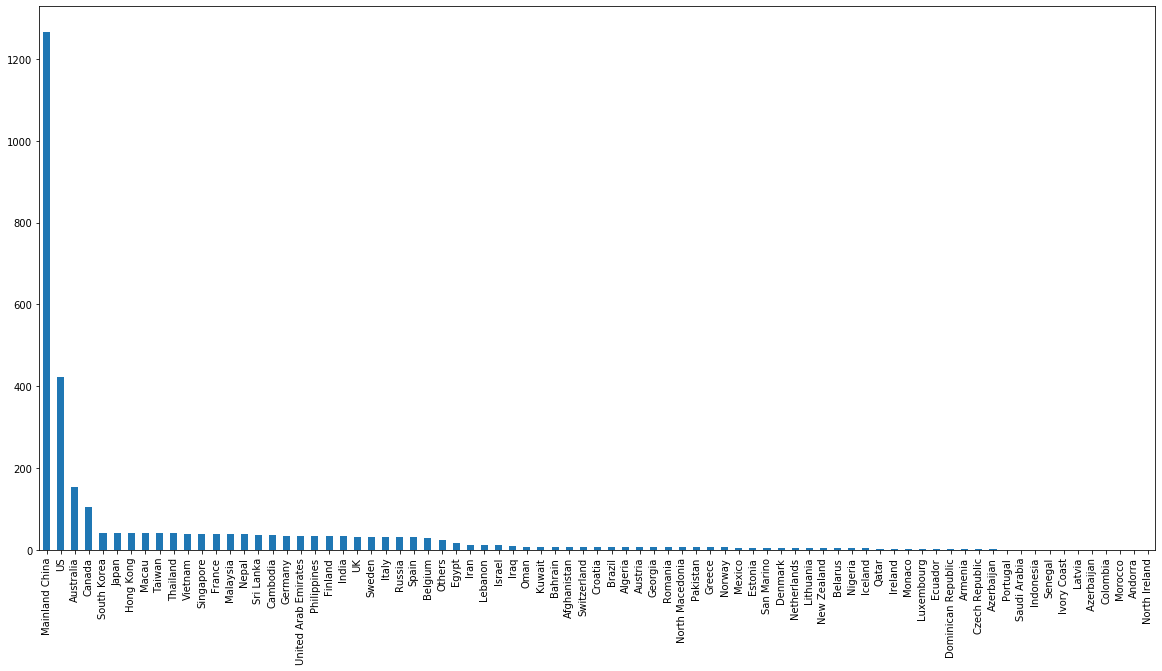

In [203]:
df['Country Region'].value_counts().plot(kind = 'bar', figsize=(20, 10))

checking for no. of countries affected


In [69]:
df['Country Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [70]:
len(df['Country Region'].unique())

79

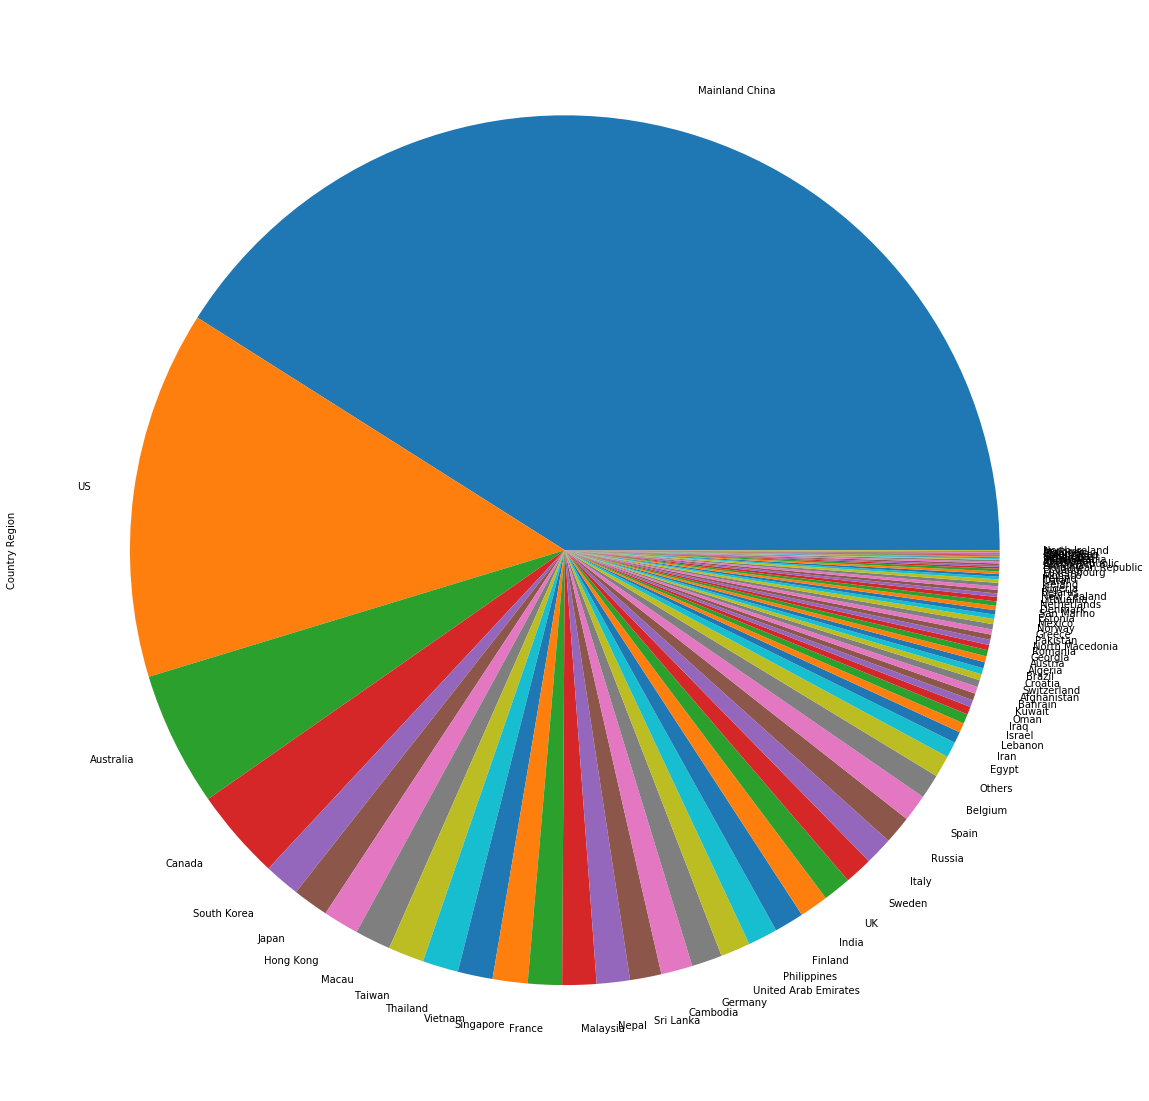

In [73]:
plt.figure(figsize = (20, 20))
df['Country Region'].value_counts().plot.pie()

In [100]:
#check for the distribution on the map
df2.head()

,Province State,Country Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,0,0,0,0,0,0,...,4,4,5,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.18238,116.4142,0,0,0,0,0,1,...,3,3,3,3,4,4,4,4,4,4
2,Chongqing,Mainland China,30.05718,107.8740,0,0,0,0,0,0,...,3,3,4,5,5,5,5,5,5,6
3,Fujian,Mainland China,26.07783,117.9895,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Gansu,Mainland China,36.06110,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [102]:
gdf2 = gpd.GeoDataFrame(df2, geometry= gpd.points_from_xy(df2['Long'], df2['Lat']))

In [103]:
gdf2.head()

,Province State,Country Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,geometry
0,Anhui,Mainland China,31.82571,117.2264,0,0,0,0,0,0,...,4,5,6,6,6,6,6,6,6,POINT (117.22640 31.82571)
1,Beijing,Mainland China,40.18238,116.4142,0,0,0,0,0,1,...,3,3,3,4,4,4,4,4,4,POINT (116.41420 40.18238)
2,Chongqing,Mainland China,30.05718,107.8740,0,0,0,0,0,0,...,3,4,5,5,5,5,5,5,6,POINT (107.87400 30.05718)
3,Fujian,Mainland China,26.07783,117.9895,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,POINT (117.98950 26.07783)
4,Gansu,Mainland China,36.06110,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,POINT (103.83430 36.06110)


In [104]:
type(gdf2)

geopandas.geodataframe.GeoDataFrame

In [111]:
#another method
points = [Point(x, y) for x, y in zip(df2.Long, df2.Lat)]
gdf3 = gpd.GeoDataFrame(df2, geometry = points)
gdf3

,Province State,Country Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,geometry
0,Anhui,Mainland China,31.82571,117.22640,0,0,0,0,0,0,...,4,5,6,6,6,6,6,6,6,POINT (117.22640 31.82571)
1,Beijing,Mainland China,40.18238,116.41420,0,0,0,0,0,1,...,3,3,3,4,4,4,4,4,4,POINT (116.41420 40.18238)
2,Chongqing,Mainland China,30.05718,107.87400,0,0,0,0,0,0,...,3,4,5,5,5,5,5,5,6,POINT (107.87400 30.05718)
3,Fujian,Mainland China,26.07783,117.98950,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,POINT (117.98950 26.07783)
4,Gansu,Mainland China,36.06110,103.83430,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,POINT (103.83430 36.06110)
5,Guangdong,Mainland China,23.33841,113.42200,0,0,0,0,0,0,...,1,2,2,2,2,4,4,5,5,POINT (113.42200 23.33841)
6,Guangxi,Mainland China,23.82908,108.78810,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,2,POINT (108.78810 23.82908)
7,Guizhou,Mainland China,26.81536,106.87480,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,POINT (106.87480 26.81536)
8,Hainan,Mainland China,19.19673,109.74550,0,0,0,0,0,1,...,4,4,4,4,4,4,4,4,4,POINT (109.74550 19.19673)
9,Hebei,Mainland China,38.04280,114.51490,0,1,1,1,1,1,...,2,3,3,3,3,3,4,4,5,POINT (114.51490 38.04280)


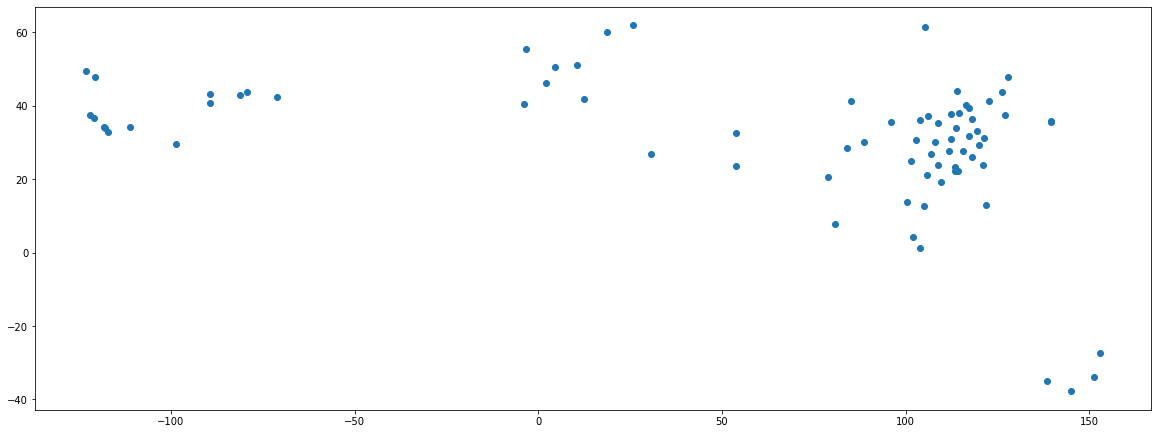

In [110]:
gdf2.plot(figsize= (20, 10))

(-198.0, 198.00000000000006, -98.6822565, 92.32738650000002)

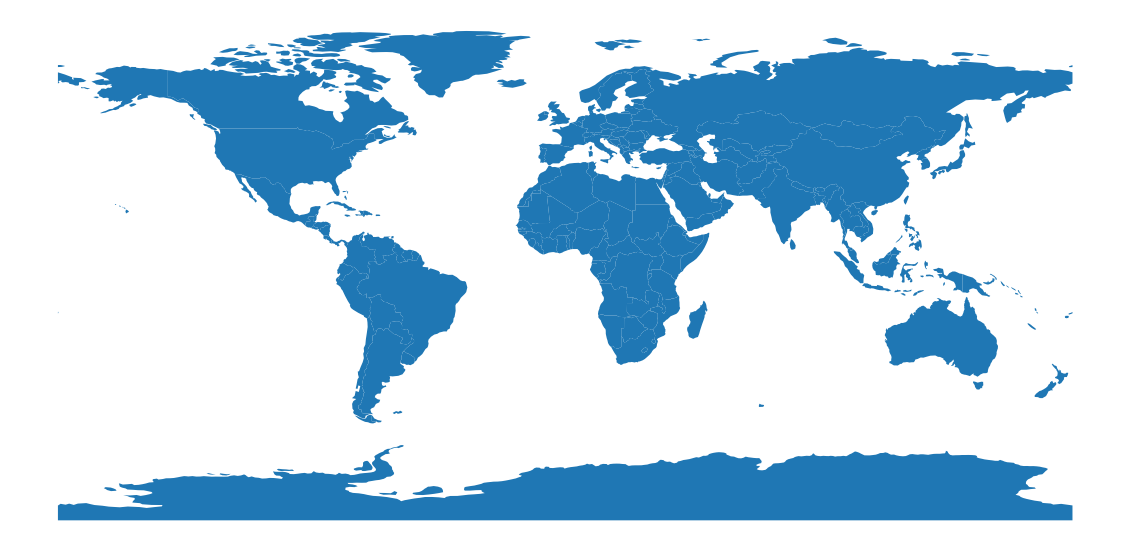

In [117]:
#creating a world map at the background

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize = (20, 10))
ax.axis('off')

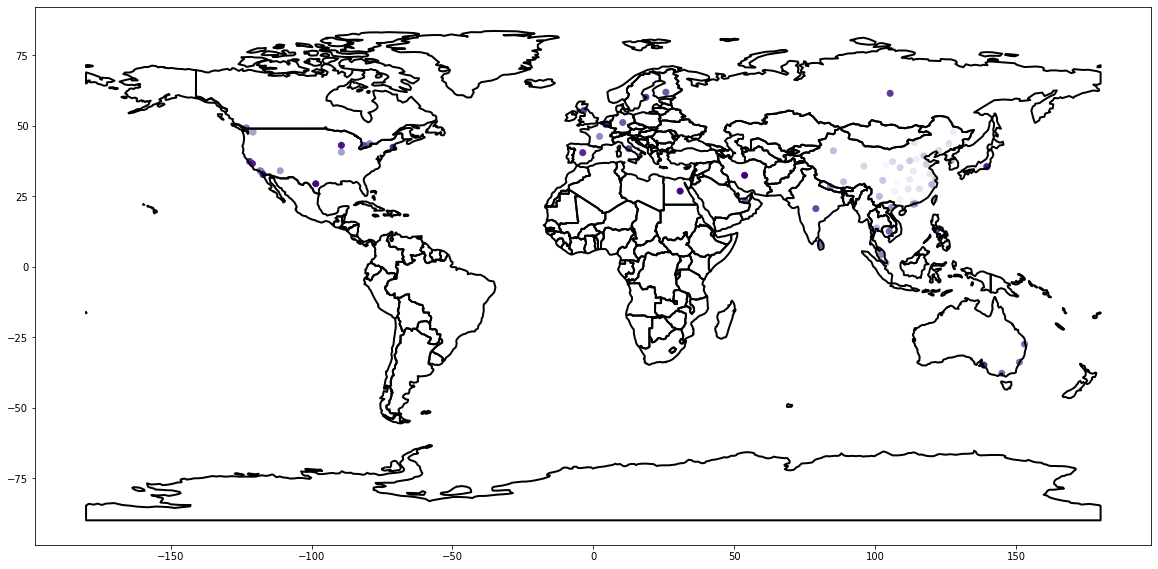

In [122]:
#overlapping the datapoints with the world map

fig, ax = plt.subplots(figsize= (20, 10))
gdf2.plot(cmap = 'Purples', ax = ax)
world.geometry.boundary.plot(edgecolor= 'k',  linewidth = 2, ax=ax)

In [127]:
world['continent'].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [130]:
asia = world[world['continent'] == 'Asia']
africa = world[world['continent'] == 'Africa']
northAmerica = world[world['continent'] == 'North America']
europe = world[world['continent'] == 'Europe']

In [151]:
df2[df2['Country Region'] == 'Mainland China']

gdf2[gdf2['Country Region'] == 'Mainland China']

,Province State,Country Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,geometry
0,Anhui,Mainland China,31.82571,117.22640,0,0,0,0,0,0,...,4,5,6,6,6,6,6,6,6,POINT (117.22640 31.82571)
1,Beijing,Mainland China,40.18238,116.41420,0,0,0,0,0,1,...,3,3,3,4,4,4,4,4,4,POINT (116.41420 40.18238)
2,Chongqing,Mainland China,30.05718,107.87400,0,0,0,0,0,0,...,3,4,5,5,5,5,5,5,6,POINT (107.87400 30.05718)
3,Fujian,Mainland China,26.07783,117.98950,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,POINT (117.98950 26.07783)
4,Gansu,Mainland China,36.06110,103.83430,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,POINT (103.83430 36.06110)
5,Guangdong,Mainland China,23.33841,113.42200,0,0,0,0,0,0,...,1,2,2,2,2,4,4,5,5,POINT (113.42200 23.33841)
6,Guangxi,Mainland China,23.82908,108.78810,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,2,POINT (108.78810 23.82908)
7,Guizhou,Mainland China,26.81536,106.87480,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,POINT (106.87480 26.81536)
8,Hainan,Mainland China,19.19673,109.74550,0,0,0,0,0,1,...,4,4,4,4,4,4,4,4,4,POINT (109.74550 19.19673)
9,Hebei,Mainland China,38.04280,114.51490,0,1,1,1,1,1,...,2,3,3,3,3,3,4,4,5,POINT (114.51490 38.04280)


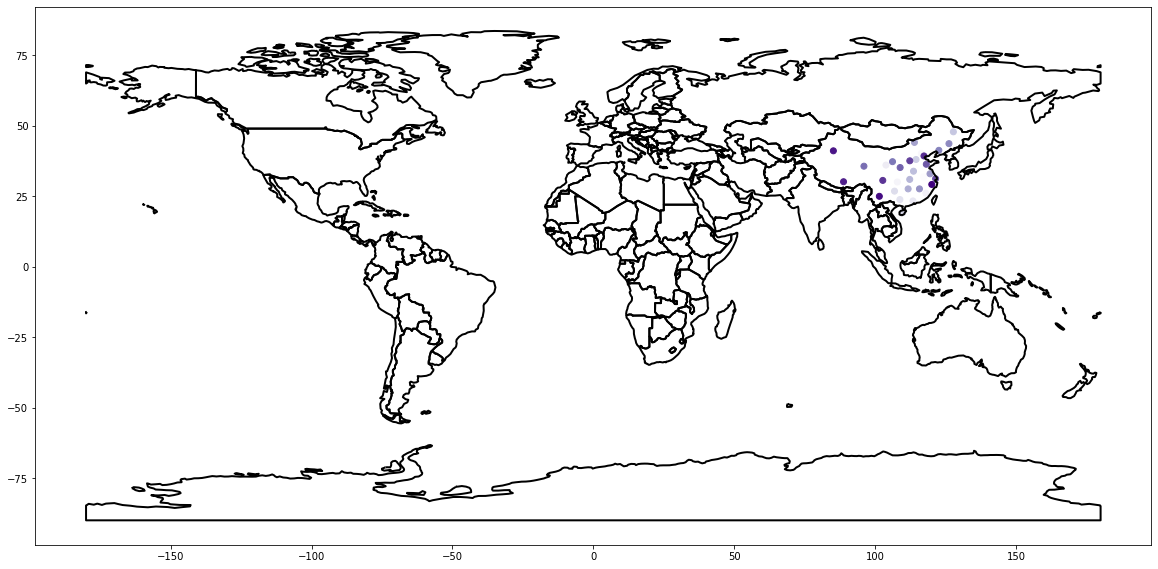

In [143]:
fig, ax = plt.subplots(figsize = (20, 10))
gdf2[gdf2['Country Region'] == 'Mainland China'].plot(cmap = 'Purples', ax= ax)
world.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth= 2, ax= ax)

Plotting only china in and only in the Asia continent. 

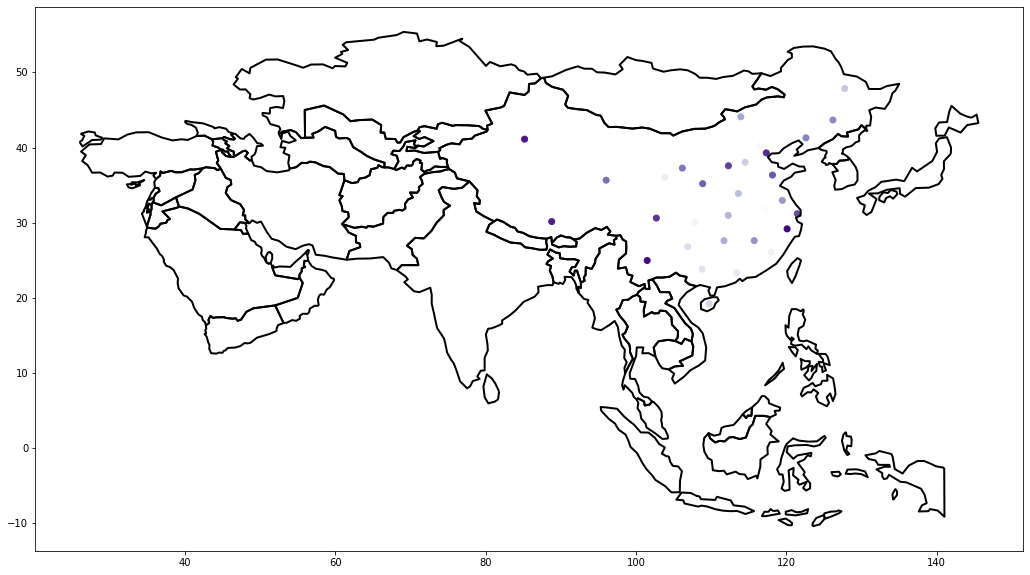

In [144]:
fig, ax = plt.subplots(figsize = (20, 10))
gdf2[gdf2['Country Region'] == 'Mainland China'].plot(cmap = 'Purples', ax= ax)
asia.geometry.boundary.plot(color = None, edgecolor = 'k', linewidth= 2, ax= ax)

Using the time series data now. 

In [155]:
#Time series analysis
df1.head()

,ObservationDate,Province State,Country Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [204]:
df1PerDay.head()

,Confirmed,Deaths,Recovered
Last Update,,,
1/22/2020 17:00,444.0,17.0,28.0
1/23/20 17:00,444.0,17.0,28.0
1/24/20 17:00,549.0,24.0,31.0
1/25/20 17:00,761.0,40.0,32.0
1/26/20 16:00,1058.0,52.0,42.0


In [158]:
dfT = df1

In [159]:
df1.to_csv("coronaVirusData.csv")

In [187]:
import datetime as dt

In [188]:
df1['casesDate'] = pd.to_datetime(dfT['Last Update'])

In [189]:
dfT.dtypes


ObservationDate            object
Province State             object
Country Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
casesDate          datetime64[ns]
dtype: object

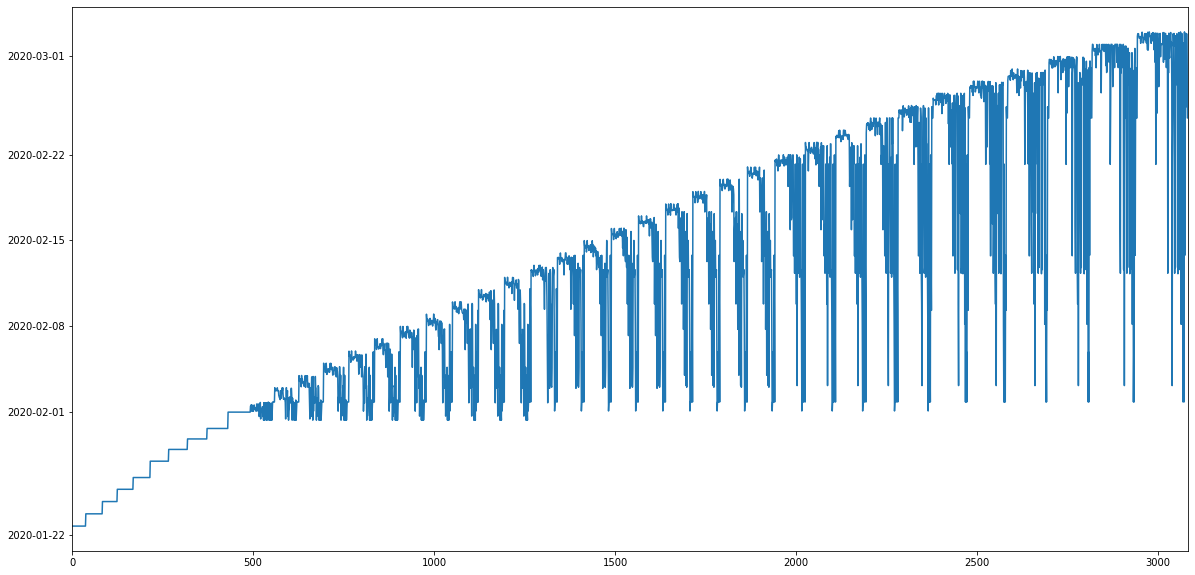

In [190]:
df1['casesDate'].plot(figsize = (20, 10))

In [205]:
ts = dfT.set_index('casesDate')


In [206]:
#we can select based in month

ts.loc['2020-02-28' : '2020-03-01'][['Confirmed', 'Recovered']]

,Confirmed,Recovered
casesDate,,
2020-02-28 00:43:01,65914.0,26403.0
2020-02-28 08:53:03,2337.0,22.0
2020-02-28 08:53:03,1348.0,935.0
2020-02-28 09:23:02,1272.0,1112.0
2020-02-28 10:03:12,1205.0,975.0
2020-02-28 09:13:10,1017.0,830.0
2020-02-28 04:43:02,990.0,821.0
2020-02-28 01:13:11,935.0,790.0
2020-02-28 20:13:09,888.0,46.0


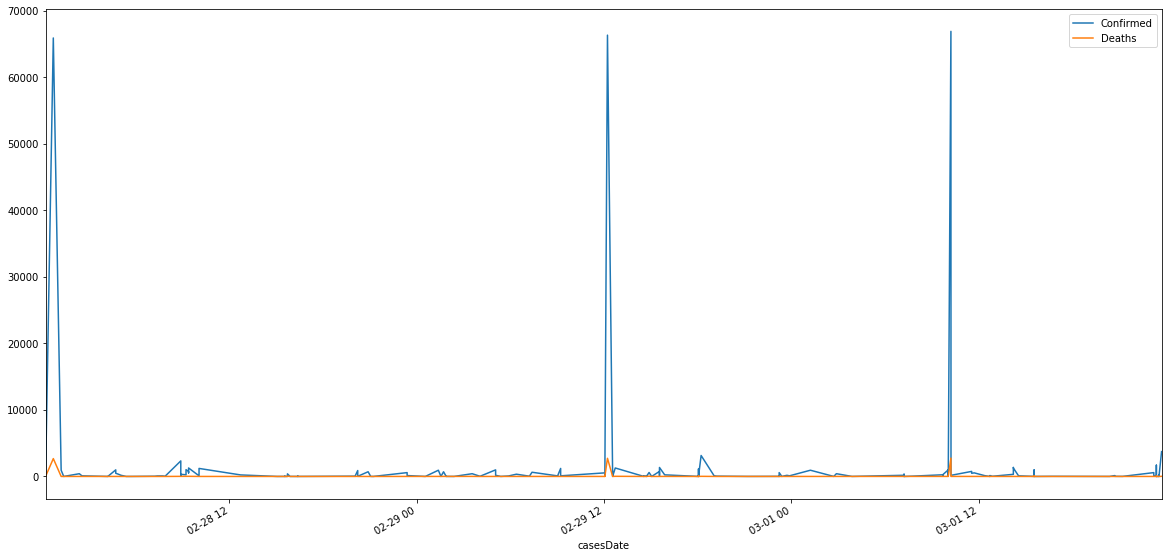

In [193]:
ts.loc['2020-02-28' : '2020-03-01'][['Confirmed', 'Deaths']].plot(figsize= (20, 10))

In [194]:
dataByDate = ts.groupby(['casesDate']).sum().reset_index(drop = None)

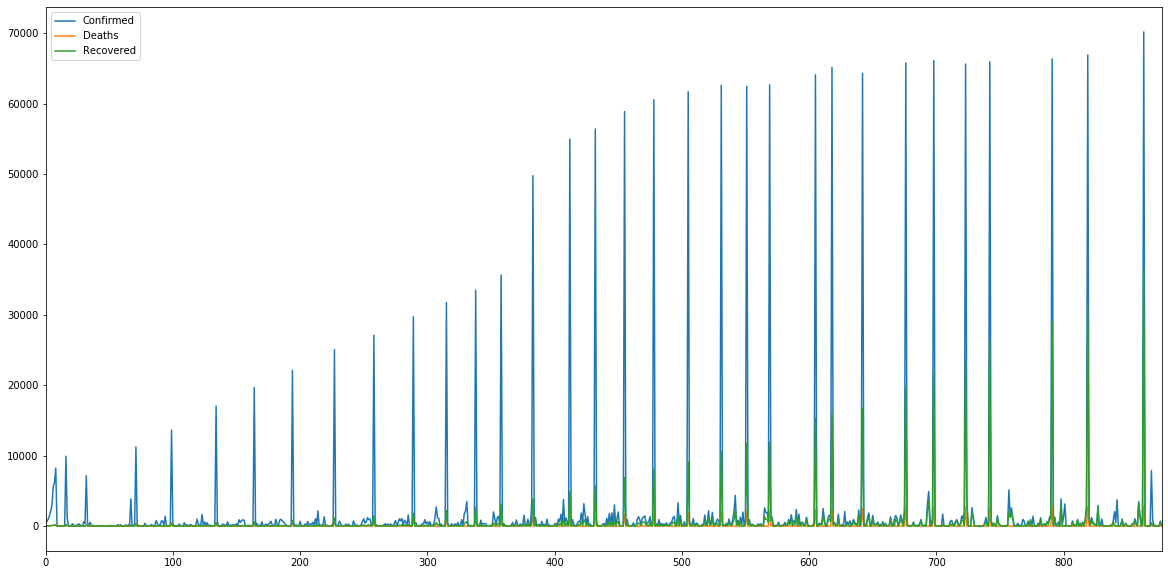

In [195]:
dataByDate[['Confirmed', 'Deaths', 'Recovered']].plot(kind = 'line', figsize = (20, 10))

From the above graph, we can infer that recovered cases are also increasing with the time. But at the same time, the confirmed cases show big increase. 


## References

1. https://geopandas.org/
2. https://github.com/CSSEGISandData/COVID-19
